In [3]:
from collections import defaultdict
from collections import deque

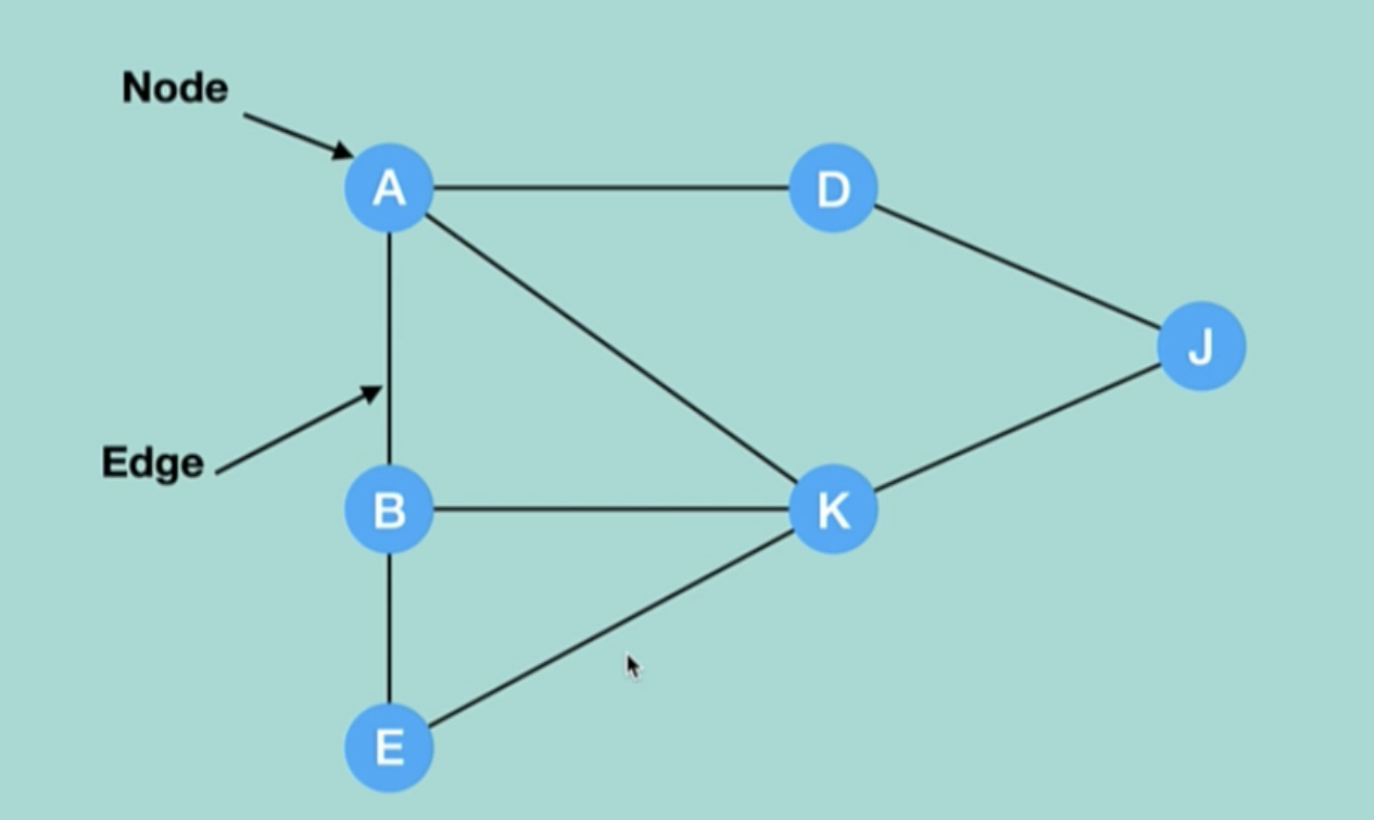

In [10]:
class Graph:
    def __init__(self, num_vertices=0):
        self.graph = defaultdict(list)
    
    def add_edge(self, vertex, edge):
        self.graph[vertex].append(edge)
    
    def breadth_first_search(self, start):
        q = deque()
        q.appendleft(start)
        visited = []
        while q:
            curr = q.pop()
            if curr not in visited:
                visited.append(curr)
                for neighbor in self.graph[curr]:
                    if neighbor not in visited:
                        q.appendleft(neighbor)
        return visited
    
    def depth_first_search(self, start):
        stack = deque()
        stack.append(start)
        visited = []
        while stack:
            curr = stack.pop()
            print(curr)
            if curr not in visited:
                visited.append(curr)
                for neighbor in self.graph[curr]:
                    if neighbor not in visited:
                        stack.append(neighbor)
        return visited

    def shortest_path(self, start, end):
        q = deque()
        q.appendleft([start])
        while q:
            path = q.pop()
            node = path[-1]
            if node == end:
                return path
            for neighbor in self.graph.get(node, []):
                new_path = list(path)
                new_path.append(neighbor)
                q.appendleft(new_path)
        return None
    
    def topo_sort(self):
        visited = []
        stack = deque()
        for node in list(self.graph):
            if node not in visited:
                self.topo_sort_helper(node, visited, stack)
        return stack
    
    def topo_sort_helper(self, v, visited, stack):
        visited.append(v)
        for neighbor in self.graph[v]:
            if neighbor not in visited:
                self.topo_sort_helper(neighbor, visited, stack)
        stack.appendleft(v)

In [11]:
gg = Graph()
gg.add_edge('a', 'd')
gg.add_edge('a', 'b')
gg.add_edge('a', 'k')
gg.add_edge('d', 'j')
gg.add_edge('k', 'j')
gg.add_edge('b', 'k')
gg.add_edge('b', 'e')
gg.add_edge('e', 'k')
print(gg.graph)

defaultdict(<class 'list'>, {'a': ['d', 'b', 'k'], 'd': ['j'], 'k': ['j'], 'b': ['k', 'e'], 'e': ['k']})


In [12]:
gg.breadth_first_search('a')

['a', 'd', 'b', 'k', 'j', 'e']

In [13]:
gg.depth_first_search('a')

a
k
j
b
e
d


['a', 'k', 'j', 'b', 'e', 'd']

In [8]:
gg.topo_sort()

deque(['a', 'b', 'e', 'k', 'd', 'j'])

In [9]:
gg.shortest_path('a', 'e')

['a', 'b', 'e']

In [14]:
gg.graph

defaultdict(list,
            {'a': ['d', 'b', 'k'],
             'd': ['j'],
             'k': ['j'],
             'b': ['k', 'e'],
             'e': ['k'],
             'j': []})